In [1]:
import sys
sys.path.insert(0, '..')
from visualization import test_classification_separation, plot_k_series_with_shaps

In [2]:
import copy
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
df = pd.read_csv('../data/sin_synth/SIN_FIXED_NONOISE_500.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,error,label
0,85.739247,1.344625,37.451670,26.843315,31.284170,-45.399383,14.300533,81.977677,-187.995462,-21.960071,...,-24.578258,103.211914,-14.518547,84.652062,7.953025,-120.718118,37.572022,120.889874,0.544000,0.0
1,-207.671318,-75.968150,33.158166,-29.512768,-164.005766,-126.672726,39.776650,-95.709632,-16.328996,-55.559408,...,-95.788062,70.440149,13.288579,120.328714,137.852343,145.181942,106.631722,-115.018158,0.535469,0.0
2,-132.060832,-45.206333,20.068966,-108.144891,103.378844,-5.526240,9.712645,23.641079,-78.266041,-113.073336,...,150.030863,61.051841,-54.133299,84.737563,-27.710857,104.115506,-77.853640,-254.261817,0.466362,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.697184
std        0.214817
min        0.247080
25%        0.492625
50%        0.720903
75%        0.900020
max        0.999381
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
df = df.drop(columns='error')
#X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
X = df.drop(columns=['label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
from gendis.genetic import GeneticExtractor
from gendis.fitness import logloss_fitness

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
args = {
    "dist_function": "original",
    "fitness": logloss_fitness,
    "apply_differencing": False,
    "population_size": 100,
    "max_shaps": 5,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [12]:
gendis.__dict__

{'dist_function': <cyfunction _pdist at 0x7d5c88651048>,
 'dist_func_returns': False,
 'fitness': <function gendis.fitness.logloss_fitness(D, y, verbose=False, return_info=False, shaps=None)>,
 'apply_differencing': False,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 0,
 'max_len': None,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, to

In [13]:
%%time
gendis.fit(X_train, y_train)

it		avg		max		time
1		-0.0225		-6e-06	1.3998
2		-0.0012		-5e-06	2.1187
3		-0.0		-4e-06	2.2591
4		-0.0		-2e-06	3.1796
5		-0.0		-1e-06	3.9882
6		-0.0		-1e-06	3.6471
7		-0.0		-1e-06	4.2086
8		-0.0		-1e-06	4.4657
9		-0.0		-1e-06	4.3165
10		-0.0		-1e-06	4.6614
11		-0.0		-1e-06	4.8868
12		-0.0		-1e-06	5.4289
13		-0.0		-1e-06	5.9099
14		-0.0		-1e-06	5.7258
15		-0.0		-1e-06	5.5536
16		-0.0		-1e-06	5.7487
17		-0.0		-1e-06	5.247
18		-0.0		-1e-06	5.8296
19		-0.0		-1e-06	6.5075
20		-0.0		-1e-06	6.4385
21		-0.0		-1e-06	6.3643
22		-0.0		-1e-06	5.7588
23		-0.0		-1e-06	5.9645
24		-0.0		-1e-06	6.9274
25		-0.0		-1e-06	6.6911
26		-0.0		-1e-06	6.5133
27		-0.0		-1e-06	7.1451
28		-0.0		-1e-06	6.3854
29		-0.0		-1e-06	7.257
30		-0.0		-1e-06	8.7916
31		-0.0		-1e-06	8.9299
32		-0.0		-1e-06	9.8945
33		-0.0		-1e-06	9.1739
34		-0.0		-1e-06	8.5595
35		-0.0		-1e-06	9.0119
36		-0.0		-1e-06	8.4343
37		-0.0		-1e-06	8.4304
38		-0.0		-1e-06	8.9064
39		-0.0		-1e-06	8.6377
40		-0.0		-1e-06	9.0617
41		-0.0		-1e-06	8.9057
42

In [14]:
%%time
distances = gendis.transform(X)
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 10.5 s, sys: 8.64 ms, total: 10.5 s
Wall time: 10.5 s


In [15]:
distances['label'] = df['label']

Testing separation for shapelet 0
Accuracy = 1.0
[[200   0]
 [  0 200]]


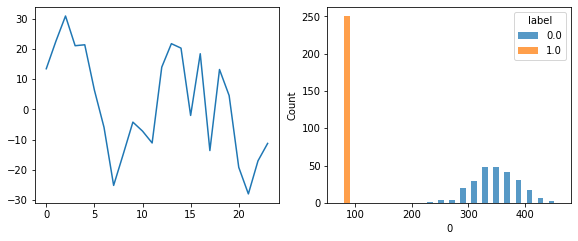

Testing separation for shapelet 1
Accuracy = 0.5675
[[112  88]
 [ 85 115]]


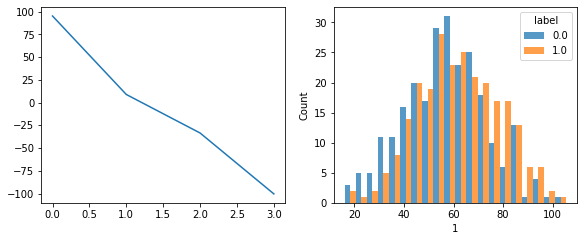

Testing separation for shapelet 2
Accuracy = 1.0
[[200   0]
 [  0 200]]


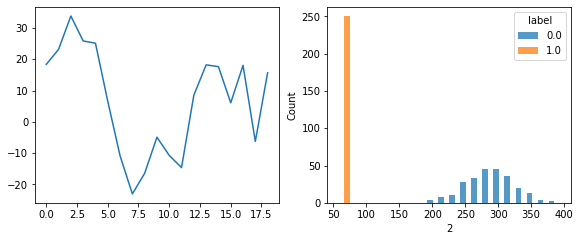

Testing separation for shapelet 3
Accuracy = 1.0
[[200   0]
 [  0 200]]


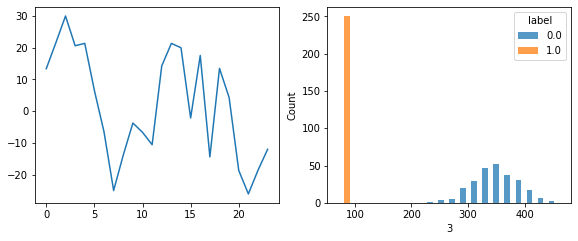

Testing separation for shapelet 4
Accuracy = 1.0
[[200   0]
 [  0 200]]


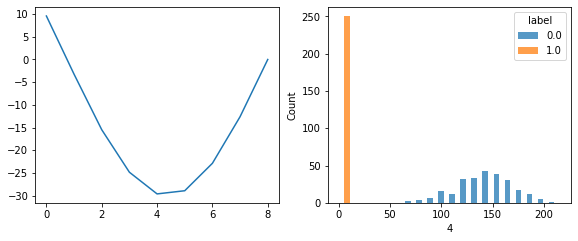

Testing separation for shapelet 5
Accuracy = 1.0
[[200   0]
 [  0 200]]


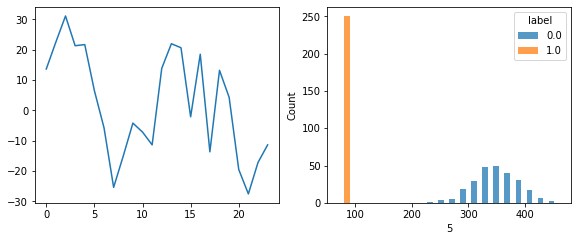

Testing separation for shapelet 6
Accuracy = 0.9975
[[199   1]
 [  0 200]]


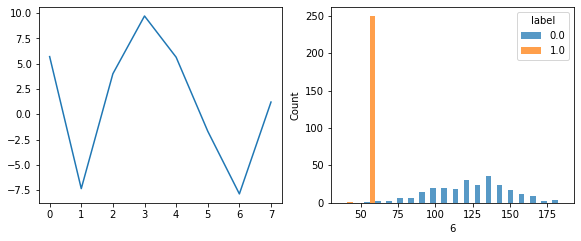

Testing separation for shapelet 7
Accuracy = 1.0
[[200   0]
 [  0 200]]


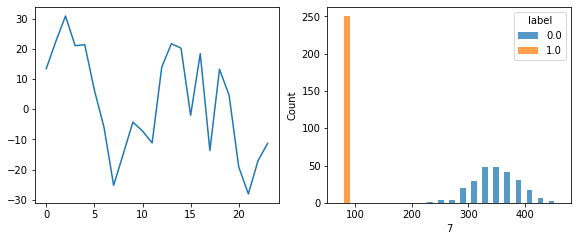

Testing separation for shapelet 8
Accuracy = 1.0
[[200   0]
 [  0 200]]


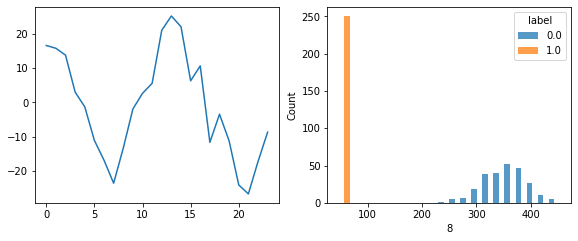

Testing separation for shapelet 9
Accuracy = 1.0
[[200   0]
 [  0 200]]


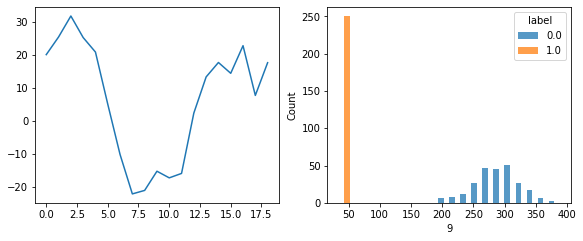

Testing separation for shapelet 10
Accuracy = 1.0
[[200   0]
 [  0 200]]


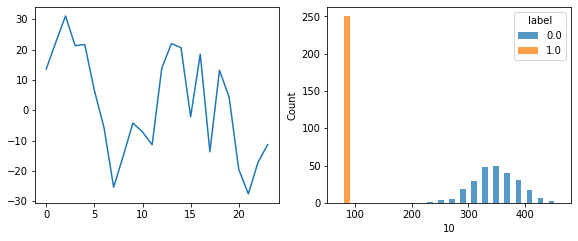

Testing separation for shapelet 11
Accuracy = 1.0
[[200   0]
 [  0 200]]


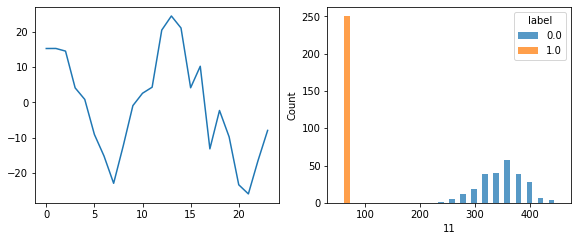

Testing separation for shapelet 12
Accuracy = 1.0
[[200   0]
 [  0 200]]


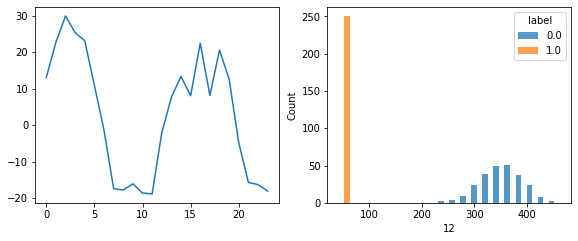

Testing separation for shapelet 13
Accuracy = 1.0
[[200   0]
 [  0 200]]


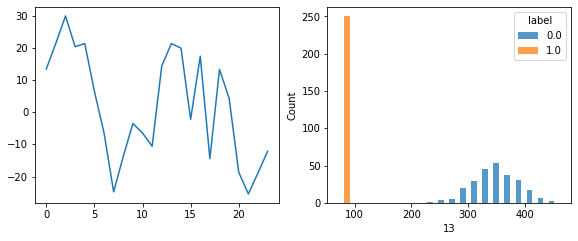

Testing separation for shapelet 14
Accuracy = 1.0
[[200   0]
 [  0 200]]


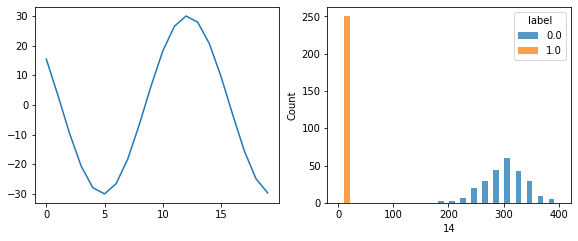

Testing separation for shapelet 15
Accuracy = 0.5
[[  0 200]
 [  0 200]]


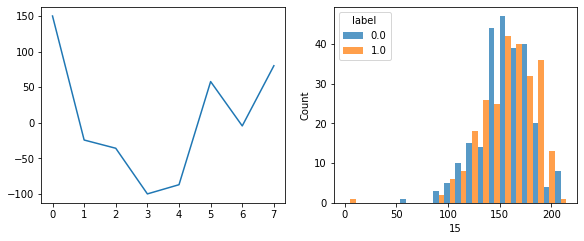

In [16]:
for i, shap in enumerate(gendis.best["shapelets"], start=0):
    test_classification_separation(
        D=distances, 
        y=y, 
        d_train=distances_train, 
        d_test=distances_test, 
        shap=shap, 
        shap_id=i,
        plot_sin_y=False
    )